## Observations and Insights 

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from matplotlib import cm
from scipy.stats import linregress
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata,study_results,on = "Mouse ID", how = "outer")
# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [57]:
# Checking the number of mice.
count= len(mouse_study_df["Mouse ID"].value_counts())
count

249

In [58]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = mouse_study_df[mouse_study_df.duplicated(["Mouse ID", "Timepoint"])]

print(duplicate_df["Mouse ID"].value_counts())
duplicate_df


g989    5
Name: Mouse ID, dtype: int64


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [59]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df2 = mouse_study_df[mouse_study_df.duplicated()]
print(duplicate_df2["Mouse ID"].value_counts())

duplicate_df2


g989    1
Name: Mouse ID, dtype: int64


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [60]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = mouse_study_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [61]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_data["Mouse ID"].value_counts())

249

## Summary Statistics

In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_df = cleaned_data["Drug Regimen"].unique()
print(drug_df)

data = cleaned_data.set_index("Drug Regimen")
# This method is the most straighforward, creating multiple series and putting them all together at the end.
ram_df = data.loc["Ramicane", "Tumor Volume (mm3)"]
cap_df = data.loc["Capomulin", "Tumor Volume (mm3)"]
inf_df = data.loc["Infubinol", "Tumor Volume (mm3)"]
pla_df = data.loc["Placebo", "Tumor Volume (mm3)"]
cef_df = data.loc["Ceftamin", "Tumor Volume (mm3)"]
ste_df = data.loc["Stelasyn", "Tumor Volume (mm3)"]
zon_df = data.loc["Zoniferol", "Tumor Volume (mm3)"]
ket_df = data.loc["Ketapril", "Tumor Volume (mm3)"]
pro_df = data.loc["Propriva", "Tumor Volume (mm3)"]
naf_df = data.loc["Naftisol", "Tumor Volume (mm3)"]

tumor_mean = [np.mean(ram_df), np.mean(cap_df), np.mean(inf_df), np.mean(pla_df), np.mean(cef_df),
                  np.mean(ste_df), np.mean(zon_df), np.mean(ket_df), np.mean(pro_df), np.mean(naf_df)]

tumor_median = [np.median(ram_df), np.median(cap_df), np.median(inf_df), np.median(pla_df), np.median(cef_df),
                    np.median(ste_df), np.median(zon_df), np.median(ket_df), np.median(pro_df), np.median(naf_df)]

tumor_var = [np.var(ram_df), np.var(cap_df), np.var(inf_df), np.var(pla_df), np.var(cef_df),
                 np.var(ste_df), np.var(zon_df), np.var(ket_df), np.var(pro_df), np.var(naf_df)]

tumor_std = [np.std(ram_df), np.std(cap_df), np.std(inf_df), np.std(pla_df), np.std(cef_df),
                 np.std(ste_df), np.std(zon_df), np.std(ket_df), np.std(pro_df), np.std(naf_df)]

tumor_sem = [ram_df.sem(), cap_df.sem(), inf_df.sem(), pla_df.sem(), cef_df.sem(),
                 ste_df.sem(), zon_df.sem(), ket_df.sem(), pro_df.sem(), naf_df.sem()]

summary_df = pd.DataFrame({"Tumor Volume Mean": tumor_mean,
                              "Tumor Volume Median": tumor_median,
                              "Tumor Volume Variance": tumor_var,
                              "Tumor Volume Standard Deviation": tumor_std,
                              "Tumor Volume SEM": tumor_sem,
                              "Drug Regimen": drug_df})

summary_df.set_index("Drug Regimen")


['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111
Zoniferol,53.236507,51.818479,48.266689,6.947423,0.516398
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Propriva,52.393463,50.909965,42.862273,6.546928,0.525862


In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
tumor_group = cleaned_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].agg(
                                                Tumor_Mean= np.mean,
                                                Tumor_Median = np.median,
                                                Tumor_Variance = np.var,
                                                Tumor_Standard_Deviation = np.std,
                                                Tumor_SEM = st.sem)
tumor_group

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Tumor_Mean,Tumor_Median,Tumor_Variance,Tumor_Standard_Deviation,Tumor_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

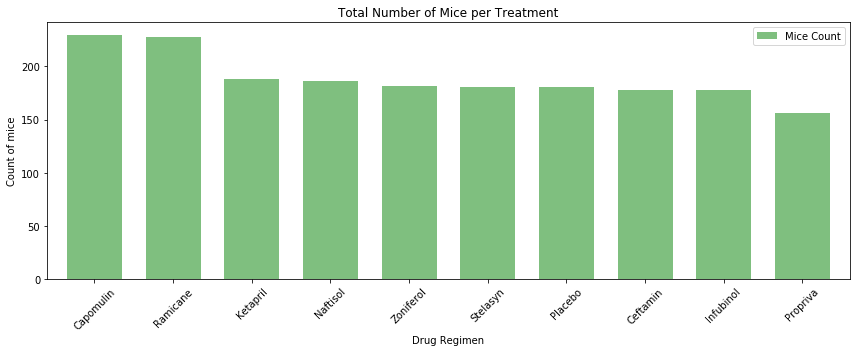

In [64]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bar_pd = cleaned_data["Drug Regimen"].value_counts()

bar_pd.plot(kind="bar", color="green", alpha=0.5, rot=45, width=0.7, label="Mice Count", figsize=(12,5))
plt.xlabel("Drug Regimen")
plt.ylabel("Count of mice")
plt.title("Total Number of Mice per Treatment")
plt.tight_layout()
plt.legend()


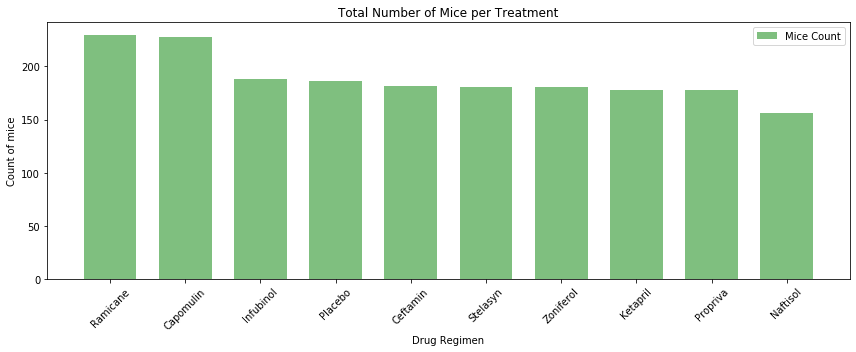

In [65]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = cleaned_data["Drug Regimen"].unique()
y_axis = cleaned_data["Drug Regimen"].value_counts()

plt.figure(figsize=(12,5))
plt.bar(x_axis, y_axis, color="green", alpha=0.5, width=0.7, label="Mice Count")
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Count of mice")
plt.title("Total Number of Mice per Treatment")
plt.tight_layout()
plt.legend()
plt.show()


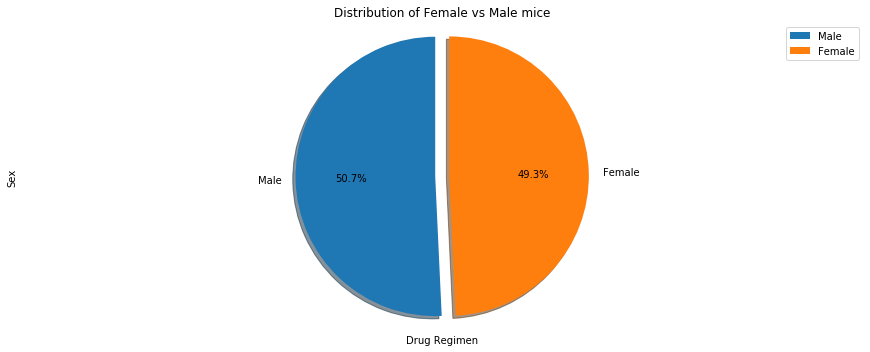

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_gender = cleaned_data["Sex"].value_counts()


pie_gender.plot(kind="pie", explode=(0,0.1), startangle=90, shadow=True, autopct='%1.1f%%', figsize=(12,5))
plt.xlabel("Drug Regimen")
plt.title("Distribution of Female vs Male mice")
plt.tight_layout()
plt.legend()
plt.axis("equal")
plt.show()


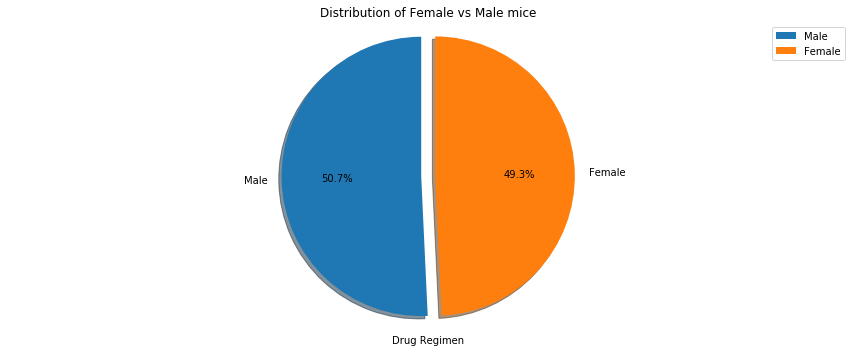

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_gender2 = cleaned_data["Sex"].value_counts()
labels = cleaned_data["Sex"].unique()

plt.figure(figsize=(12,5))
plt.pie(pie_gender2, labels=labels, explode=(0,0.1), startangle=90, shadow=True, autopct='%1.1f%%')
plt.xlabel("Drug Regimen")
plt.title("Distribution of Female vs Male mice")
plt.tight_layout()
plt.legend()
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

reg_df = cleaned_data.set_index("Drug Regimen")[["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]
select_reg = reg_df.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], :]
# Start by getting the last (greatest) timepoint for each mouse
final_vol = select_reg.drop_duplicates(subset = "Mouse ID", keep='last')
final_df = final_vol.reset_index()

del final_df["Drug Regimen"]


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(mouse_metadata, final_df, on="Mouse ID")
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Timepoint
0,k403,Ramicane,Male,21,16,22.050126,45
1,s185,Capomulin,Female,3,17,23.343598,45
2,x401,Capomulin,Female,16,15,28.484033,45
3,m601,Capomulin,Male,22,17,28.430964,45
4,g791,Ramicane,Male,11,16,29.128472,45


In [69]:
# Put treatments into a list for for loop (and later for plot labels)
treat_df = merge_df["Drug Regimen"]
treat_list = treat_df.tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_df = merge_df["Tumor Volume (mm3)"]
data_df = pd.DataFrame({"Drug Regimen": treat_list,
                       "Tumor Volume (mm3)": tumor_df})

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
cap_plt = data_df[(data_df["Drug Regimen"] == "Capomulin")]
ram_plt = data_df[(data_df["Drug Regimen"] == "Ramicane")]
cef_plt = data_df[(data_df["Drug Regimen"] == "Ceftamin")]
inf_plt = data_df[(data_df["Drug Regimen"] == "Infubinol")]
    
    
    # add subset 
cap_tmv = cap_plt["Tumor Volume (mm3)"]
ram_tmv = ram_plt["Tumor Volume (mm3)"]
cef_tmv = cef_plt["Tumor Volume (mm3)"]
inf_tmv = inf_plt["Tumor Volume (mm3)"]   
    
    # Determine outliers using upper and lower bounds
# Capomulin
cap_quartiles = round((cap_tmv.quantile([.25,.5,.75])),2)
cap_lowerq = round(cap_quartiles[0.25], 2)
cap_upperq = round(cap_quartiles[0.75], 2)
cap_iqr = round((cap_upperq - cap_lowerq), 2)

print(f"---------------Capomulin Treatment------------------")
print(f"The lower quartile of temperatures is: {cap_lowerq}")
print(f"The upper quartile of temperatures is: {cap_upperq}")
print(f"The interquartile range of temperatures is: {cap_iqr}")
print(f"The median of temperatures is: {cap_quartiles[0.5]} ")

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
cap_out = cap_plt.loc[(cap_tmv < cap_lower_bound) | (cap_tmv > cap_upper_bound)]
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.") 
print(f"The potential outliers is: \n{cap_out}")
print(f"----------------------------------------------------")   
    

    
# Ramicane
ram_quartiles = round((ram_tmv.quantile([.25,.5,.75])),2)
ram_lowerq = round(ram_quartiles[0.25], 2)
ram_upperq = round(ram_quartiles[0.75], 2)
ram_iqr = round((ram_upperq - ram_lowerq), 2)

print(f"----------------Ramicane Treatment------------------")
print(f"The lower quartile of temperatures is: {ram_lowerq}")
print(f"The upper quartile of temperatures is: {ram_upperq}")
print(f"The interquartile range of temperatures is: {ram_iqr}")
print(f"The median of temperatures is: {ram_quartiles[0.5]} ")

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = round((ram_upperq + (1.5*ram_iqr)), 2)
ram_out = ram_plt.loc[(ram_tmv < ram_lower_bound) | (ram_tmv > ram_upper_bound)]
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")
print(f"The potential outliers are: \n{ram_out}")
 

#Ceftamin
cef_quartiles = round((cef_tmv.quantile([.25,.5,.75])),2)
cef_lowerq = round(cef_quartiles[0.25], 2)
cef_upperq = round(cef_quartiles[0.75], 2)
cef_iqr = round((cef_upperq - cef_lowerq), 2)

print(f"----------------Ceftamin Treatment------------------")
print(f"The lower quartile of temperatures is: {cef_lowerq}")
print(f"The upper quartile of temperatures is: {cef_upperq}")
print(f"The interquartile range of temperatures is: {cef_iqr}")
print(f"The median of temperatures is: {cef_quartiles[0.5]} ")

cef_lower_bound = round((cef_lowerq - (1.5*cef_iqr)),2)
cef_upper_bound = round((cef_upperq + (1.5*cef_iqr)), 2)
cef_out = cef_plt.loc[(cef_tmv < cef_lower_bound) | (cef_tmv > cef_upper_bound)]
print(f"Values below {cef_lower_bound} could be outliers.")
print(f"Values above {cef_upper_bound} could be outliers.")
print(f"The potential outliers are: \n{cef_out}")
    
#Infubinol
inf_quartiles = round((inf_tmv.quantile([.25,.5,.75])),2)
inf_lowerq = round(inf_quartiles[0.25], 2)
inf_upperq = round(inf_quartiles[0.75], 2)
inf_iqr = round((inf_upperq - inf_lowerq), 2)

print(f"----------------Infubinol Treatment------------------")
print(f"The lower quartile of temperatures is: {inf_lowerq}")
print(f"The upper quartile of temperatures is: {inf_upperq}")
print(f"The interquartile range of temperatures is: {inf_iqr}")
print(f"The median of temperatures is: {inf_quartiles[0.5]} ")

inf_lower_bound = round((inf_lowerq - (1.5*inf_iqr)),2)
inf_upper_bound = round((inf_upperq + (1.5*inf_iqr)), 2)
inf_out = inf_plt.loc[(inf_tmv < inf_lower_bound) | (inf_tmv > inf_upper_bound)]
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")
print(f"The potential outliers is: {inf_out}")
print(f"                                                      ")
print(f"The potential outliers from all four Drug Regimen is: ")
inf_out    

---------------Capomulin Treatment------------------
The lower quartile of temperatures is: 32.38
The upper quartile of temperatures is: 40.16
The interquartile range of temperatures is: 7.78
The median of temperatures is: 38.13 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
The potential outliers is: 
Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []
----------------------------------------------------
----------------Ramicane Treatment------------------
The lower quartile of temperatures is: 31.56
The upper quartile of temperatures is: 40.66
The interquartile range of temperatures is: 9.1
The median of temperatures is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
The potential outliers are: 
Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []
----------------Ceftamin Treatment------------------
The lower quartile of temperatures is: 48.72
The upper quartile of temperatures is: 64

,Drug Regimen,Tumor Volume (mm3)
58,Infubinol,36.321346


<function matplotlib.pyplot.legend(*args, **kwargs)>

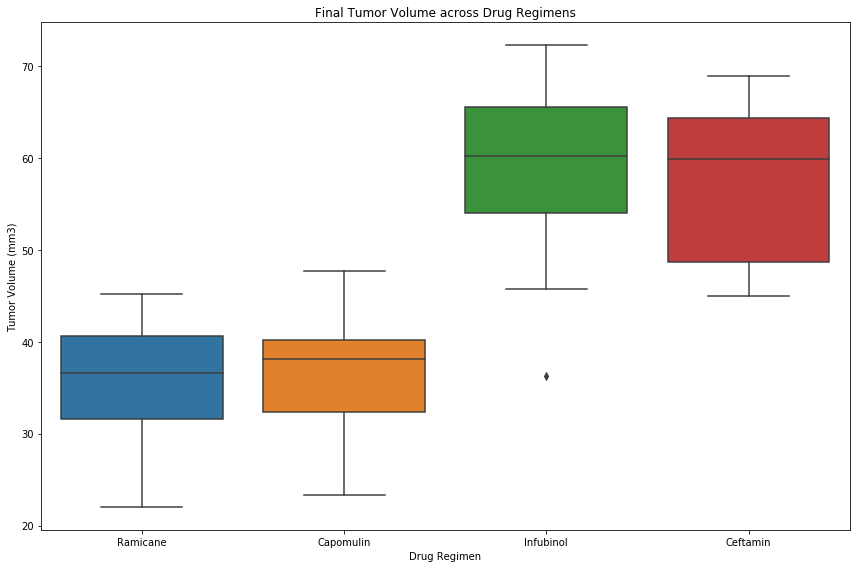

In [70]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(12,8))
dd=pd.melt(data_df,id_vars=['Drug Regimen'],value_vars=['Tumor Volume (mm3)'])
sns.boxplot(x='Drug Regimen',y='value',data=dd)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Final Tumor Volume across Drug Regimens")
plt.tight_layout()
plt.legend

## Line and Scatter Plots

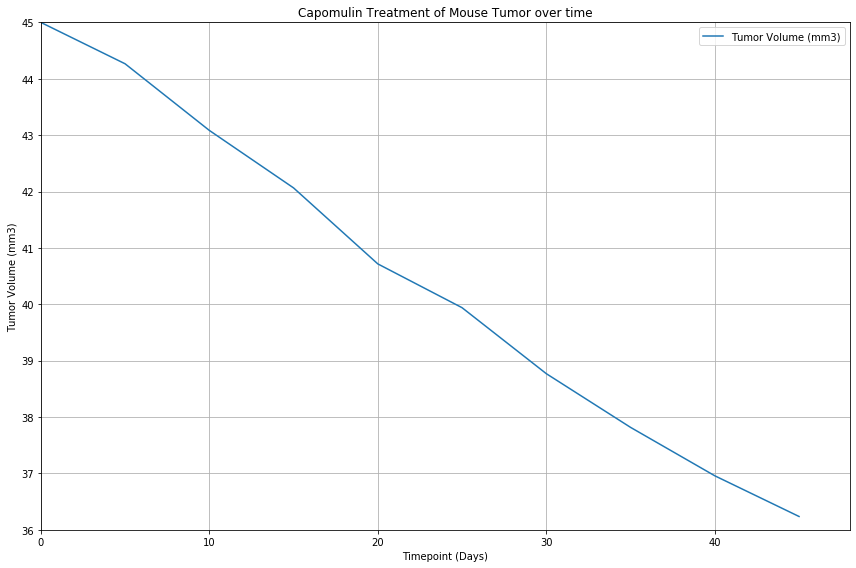

In [74]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plot_data = cleaned_data[["Mouse ID","Drug Regimen", "Timepoint", "Tumor Volume (mm3)", "Weight (g)"]]
cap_data = plot_data[(plot_data["Drug Regimen"] == "Capomulin")]
cap_data

cap_group = cap_data.groupby("Timepoint")["Tumor Volume (mm3)"].mean()
bar = cap_group.plot(kind="line", grid=True, alpha=3, figsize=(12,8))
plt.xlim(0, 48)
plt.ylim(36, 45)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse Tumor over time")
plt.tight_layout()
plt.legend()

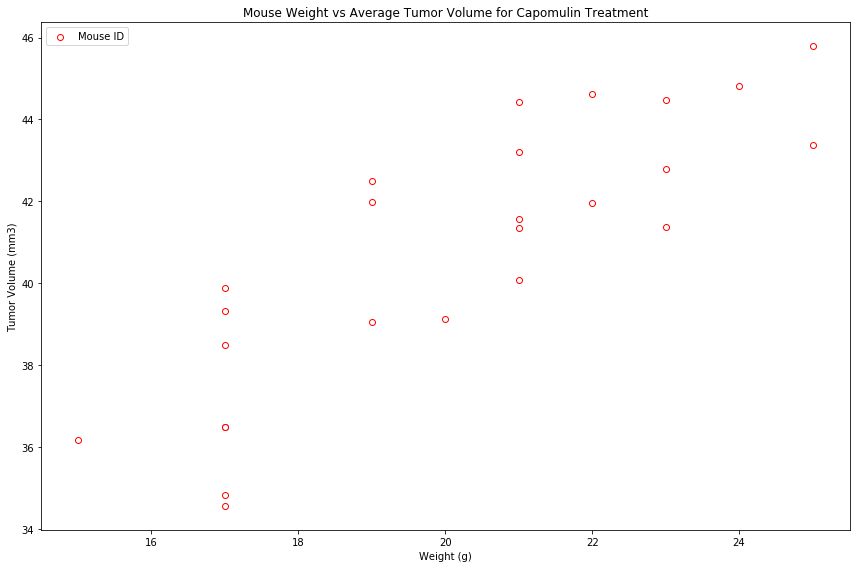

In [80]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_data

cap_groupn = cap_data.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()

x_axis = cap_groupn["Weight (g)"]
y_axis = cap_groupn["Tumor Volume (mm3)"]

plt.figure(figsize=(12, 8))
plt.scatter(x_axis, y_axis, color="white", edgecolors="red", label="Mouse ID")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin Treatment")
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

## Correlation and Regression

The correlation coefficient is: 0.84
The r-value squared is: 0.7088568047708717
The equation of the regression line is: y= 0.95x + 21.55


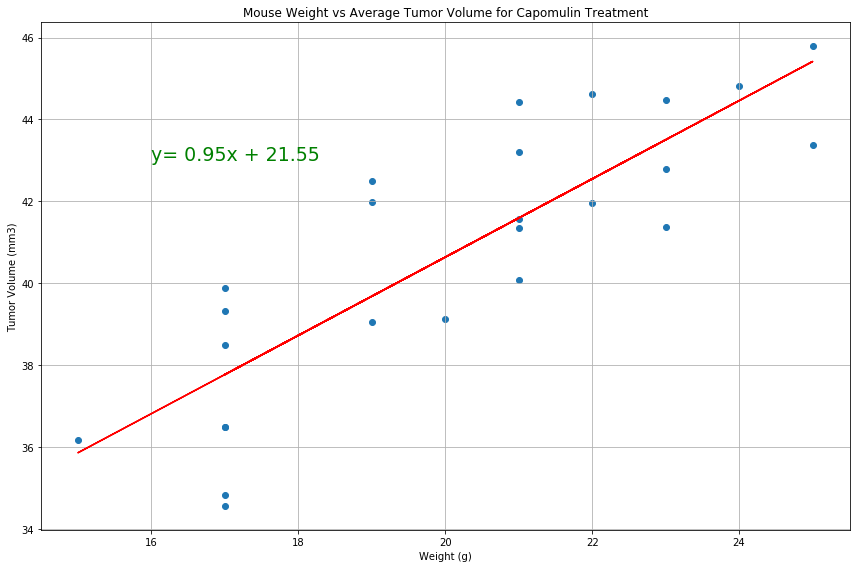

In [87]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_axis = cap_groupn["Weight (g)"]
y_axis = cap_groupn["Tumor Volume (mm3)"]

correlation = round(st.pearsonr(x_axis, y_axis)[0], 2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y= " + str(round((slope), 2)) + "x + " + str(round(intercept, 2))

plt.figure(figsize=(12,8))

print(f"The correlation coefficient is: {correlation}")
print(f"The r-value squared is: {rvalue**2}")
print(f"The equation of the regression line is: {line_eq}")

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(16,43),fontsize=19,color="green")
plt.grid()
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin Treatment")
plt.tight_layout()
plt.show()